In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Loading the training set

In [21]:
import os
import tensorflow as tf
import numpy as np
from os.path import dirname

# Set the seed for random operations. 
# This let our experiments to be reproducible. 
SEED = 1234
tf.random.set_seed(SEED)  

# Get current working directory
cwd = os.getcwd()
parent_cwd = dirname(cwd)

In [24]:
# Defining training directory
dataset_dir = os.path.join(parent_cwd, "data")
dataset_dir = os.path.join(dataset_dir, "Classification_Dataset")
dataset_dir = os.path.join(dataset_dir, "training")

In [29]:
# ImageDataGenerator
# ------------------

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255)

bs = 8
img_h = 256
img_w = 256

train_gen = train_data_gen.flow_from_directory(dataset_dir,
                                               batch_size=bs, 
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=SEED)  # targets are directly converted into one-hot vectors


Found 1554 images belonging to 20 classes.


In [30]:
num_classes = 20

In [31]:
train_dataset = tf.data.Dataset.from_generator(lambda: train_gen,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([None, img_h, img_w, 3], [None, num_classes]))


<bound method DatasetV2.enumerate of <DatasetV1Adapter shapes: ((None, 256, 256, 3), (None, 20)), types: (tf.float32, tf.float32)>>

<IPython.core.display.Javascript object>


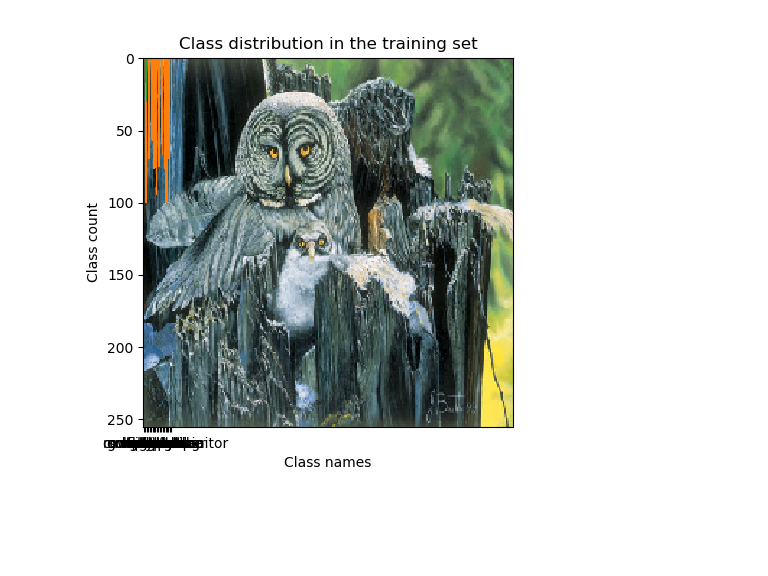

KeyboardInterrupt: 

In [37]:
# Let's test data augmentation
# ----------------------------
import time
import matplotlib.pyplot as plt

%matplotlib notebook

fig = plt.figure()
ax = fig.gca()
fig.show()

iterator = iter(train_dataset)

for _ in range(1554):
    image, target = next(iterator)
    image = image[0]   # First element
    image = image * 255  # denormalize
    
    plt.imshow(np.uint8(image))
    fig.canvas.draw()
    time.sleep(1)

In [38]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

# Let's understand information provided in the competition description

In [44]:
class_dict = {'school-bus' : 73,
    'laptop' : 100,
    't-shirt' : 100,
    'grand-piano' : 70,
    'waterfall' : 70,
    'galaxy' : 56,
    'mountain-bike' : 57,
    'sword' : 77,
    'wine-bottle' : 76,
    'owl' : 95,
    'fireworks' : 75,
    'calculator' : 75,
    'sheet-music' : 59,
    'lightbulb' : 67,
    'bear' : 77,
    'computer-monitor' : 100,
    'airplanes' : 100,
    'skyscraper' : 70,
    'lightning' : 100,
    'kangaroo' : 57}

In [47]:
class_count = 0
for key in class_dict.keys():
    class_count += class_dict[key]
class_count # This information concerns only the input dataset

1554

Let's visualize the class information, to have some graphics help.  

<IPython.core.display.Javascript object>


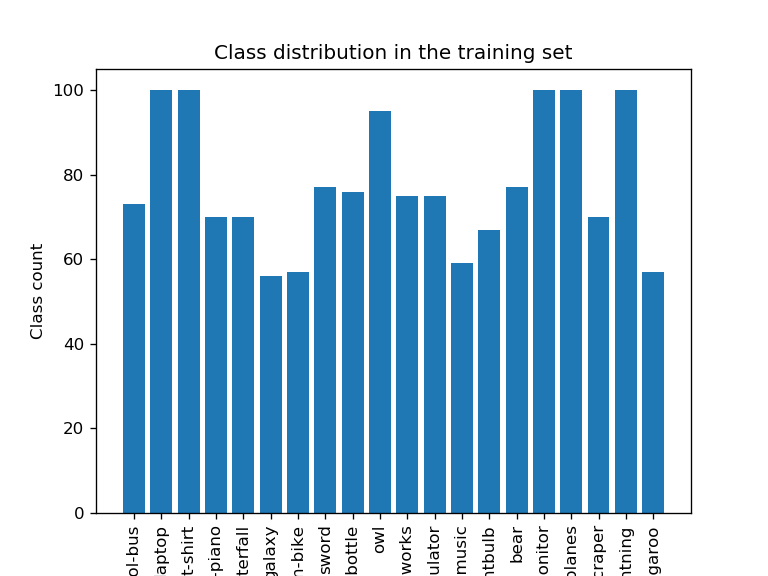

<BarContainer object of 20 artists>

([<matplotlib.axis.XTick at 0x1d6f6d4d2b0>,
 <a list of 20 Text xticklabel objects>)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

Text(0.5, 1.0, 'Class distribution in the training set')

Text(0.5, 0, 'Class names')

Text(0, 0.5, 'Class count')

In [54]:
import matplotlib.pyplot as plt
%matplotlib notebook

D=class_dict
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xticks(rotation=90)
plt.title("Class distribution in the training set")
plt.xlabel("Class names")
plt.ylabel("Class count")

plt.show()